Analysis of the optimization result dependence on the value of the PROTES parameters for the binary knapsack problem (n = 2; d = 50). See `demo/demo_qubo.py` for details.

---

# Imports

In [28]:
import matplotlib as mpl
import numpy as np
from time import perf_counter as tpc


mpl.rcParams.update({
    'font.family': 'normal',
    'font.serif': [],
    'font.sans-serif': [],
    'font.monospace': [],
    'font.size': 12,
    'text.usetex': True,
})


import matplotlib.cm as cm
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import seaborn as sns


sns.set_context('paper', font_scale=2.5)
sns.set_style('white')
sns.mpl.rcParams['legend.frameon'] = 'False'


from protes import protes

# Target function

In [2]:
def func_build():
    """Binary knapsack problem."""

    d = 50
    n = 2

    w = [
        80, 82, 85, 70, 72, 70, 66, 50, 55, 25, 50, 55, 40, 48, 59, 32, 22,
        60, 30, 32, 40, 38, 35, 32, 25, 28, 30, 22, 50, 30, 45, 30, 60, 50,
        20, 65, 20, 25, 30, 10, 20, 25, 15, 10, 10, 10, 4, 4, 2, 1]

    p = [
        220, 208, 198, 192, 180, 180, 165, 162, 160, 158, 155, 130, 125,
        122, 120, 118, 115, 110, 105, 101, 100, 100, 98, 96, 95, 90, 88, 82,
        80, 77, 75, 73, 72, 70, 69, 66, 65, 63, 60, 58, 56, 50, 30, 20, 15,
        10, 8, 5, 3, 1]

    C = 1000

    def func(i):
        """Target function: y=f(i); [d] -> float."""
        cost = np.dot(p, i)
        constr = np.dot(w, i)
        return 0 if constr > C else -cost

    return d, n, lambda I: np.array([func(i) for i in I])

In [3]:
d, n, f = func_build() # Target function
y_real = -3103         # Exact optimum value

# Parameters

In [4]:
# Number of requests to the objective function:
m = int(1.E+4)

# The batch size for optimization:
k_list = [50, 100, 150, 200, 250]

# Number of selected candidates for all batches:
k_top_list = [5, 10, 15, 20, 25]

# TT-rank of the probability TT-tensor:
r_list = [3, 5, 7]

# Number of gradient steps:
k_gd = 1

# Learning rate:
lr = 5.E-2

# Computations

In [5]:
result = {}
for r in r_list:
    result[r] = {}
    for k in k_list:
        result[r][k] = {}
        for k_top in k_top_list:
            t = tpc()
            i_opt, y_opt = protes(f, d, n, m, k=k, k_top=k_top, k_gd=k_gd, lr=lr, r=r, seed=0)
            e = np.abs(y_real - y_opt) / np.abs(y_real)
            t = tpc() - t
            print(f'>>> r = {r:-5d} | k = {k:-5d} | k_top = {k_top:-5d} | e = {e:-8.2e} | t = {t:-8.2f}')
            result[r][k][k_top] = {'e': e, 't': t}

>>> r =     3 | k =    50 | k_top =     5 | e = 1.26e-02 | t =     4.34
>>> r =     3 | k =    50 | k_top =    10 | e = 7.73e-03 | t =     3.02
>>> r =     3 | k =    50 | k_top =    15 | e = 2.32e-02 | t =     3.51
>>> r =     3 | k =    50 | k_top =    20 | e = 2.58e-02 | t =     3.38
>>> r =     3 | k =    50 | k_top =    25 | e = 1.48e-02 | t =     3.07
>>> r =     3 | k =   100 | k_top =     5 | e = 3.22e-03 | t =     3.20
>>> r =     3 | k =   100 | k_top =    10 | e = 5.48e-03 | t =     2.75
>>> r =     3 | k =   100 | k_top =    15 | e = 7.41e-03 | t =     2.73
>>> r =     3 | k =   100 | k_top =    20 | e = 9.99e-03 | t =     3.26
>>> r =     3 | k =   100 | k_top =    25 | e = 1.16e-02 | t =     2.74
>>> r =     3 | k =   150 | k_top =     5 | e = 6.12e-03 | t =     3.00
>>> r =     3 | k =   150 | k_top =    10 | e = 7.41e-03 | t =     2.86
>>> r =     3 | k =   150 | k_top =    15 | e = 5.48e-03 | t =     2.83
>>> r =     3 | k =   150 | k_top =    20 | e = 1.32e-02 | t =  

# Plot results

In [6]:
def prep_ax(ax, xlog=False, ylog=False, leg=False, xint=False, xticks=None):
    if xlog:
        ax.semilogx()
    if ylog:
        ax.semilogy()

    if leg:
        ax.legend(loc='upper left', frameon=True)

    ax.grid(ls=":")

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

    if xint:
        ax.xaxis.set_major_locator(MaxNLocator(integer=True))

    if xticks is not None:
        ax.set(xticks=xticks, xticklabels=xticks)

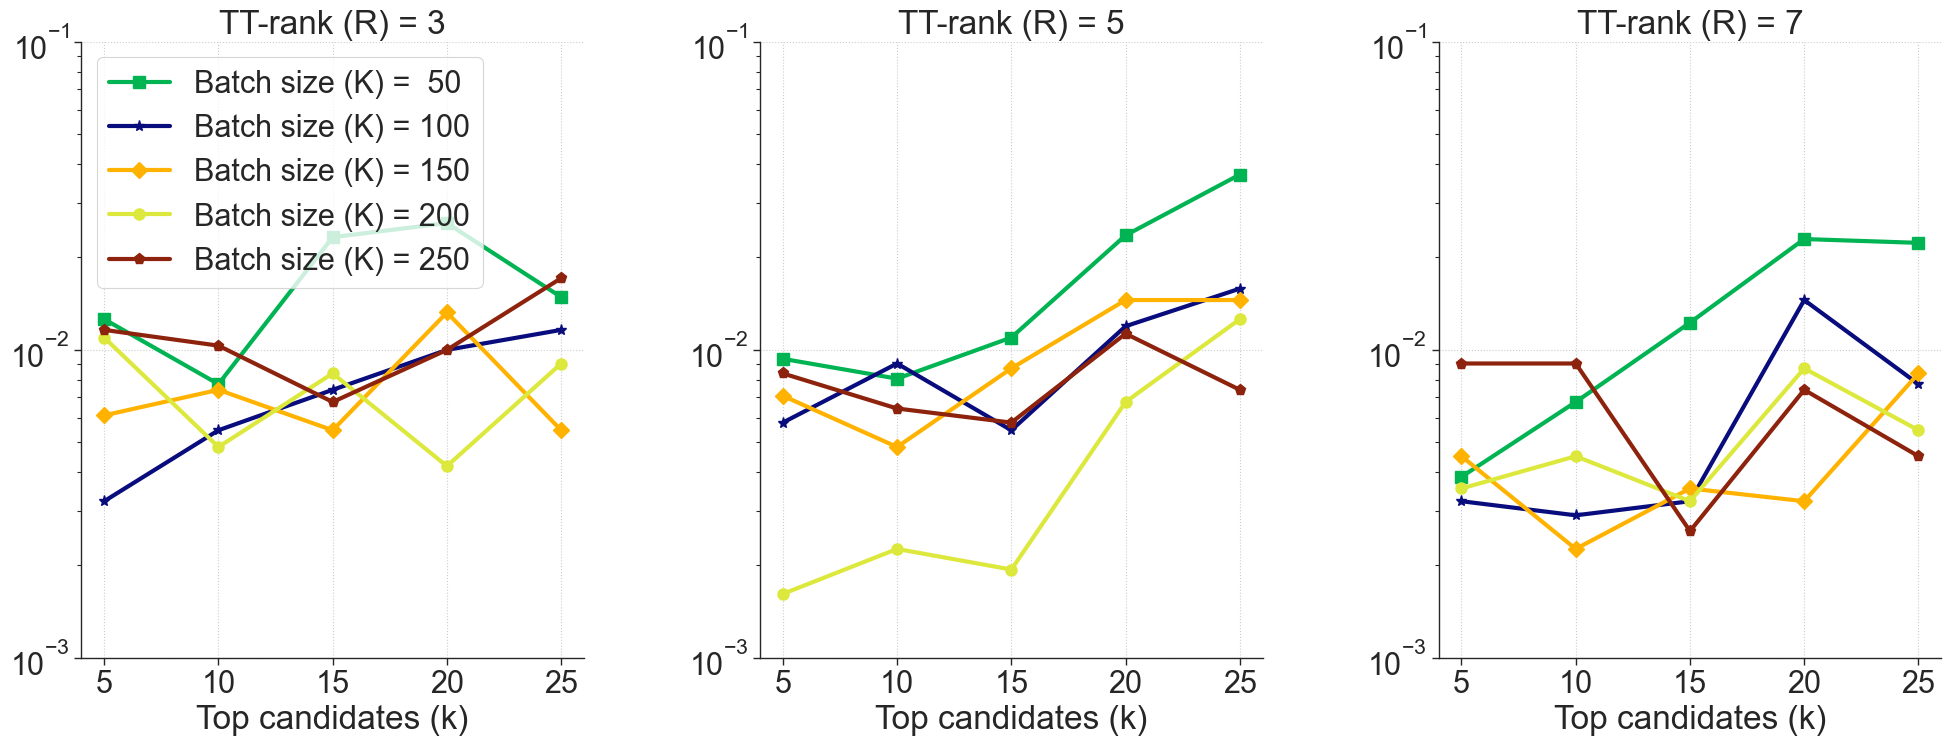

In [9]:
colors = ['#00B454', '#080c7c', '#FFB300', '#DDE83C', '#8d230d']
marker = ['s', '*', 'D', 'o', 'p']
    
fig, axs = plt.subplots(1, 3, figsize=(24, 8))
plt.subplots_adjust(wspace=0.35, hspace=0.35)
axs = axs.flatten()

num = -1
for r in r_list:
    num += 1
    ax = axs[num]
    ax.set_xlabel('Top candidates (k)')
    ax.set_title(f'TT-rank (R) = {r}')    
    
    for i, k in enumerate(k_list):
        x = k_top_list
        y = [result[r][k][x_cur]['e'] for x_cur in x]
        ax.plot(x, y, label=f'Batch size (K) = {k:-3d}',
            marker=marker[i], markersize=8, linewidth=3, color=colors[i])
    
    prep_ax(ax, xlog=False, ylog=True, leg=(num==0),
        xint=True, xticks=k_top_list)
    ax.set_ylim(1.E-3, 1.E-1)

plt.savefig('figures/check_knapsack.png', bbox_inches='tight')

# Parameters for the new run

In [20]:
# Number of requests to the objective function:
m = int(1.E+4)

# The batch size for optimization:
k = 100

# Number of selected candidates for all batches:
k_top = 10

# TT-rank of the probability TT-tensor:
r_list = [3, 5, 7]

# Number of gradient steps:
k_gd_list = [1, 10, 25, 50, 100]

# Learning rate:
lr_list = [5.E-3, 1.E-2, 5.E-2, 1.E-1, 5.E-1]

# Computations

In [21]:
result_ext = {}
for r in r_list:
    result_ext[r] = {}
    for lr in lr_list:
        result_ext[r][lr] = {}
        for k_gd in k_gd_list:
            t = tpc()
            i_opt, y_opt = protes(f, d, n, m, k=k, k_top=k_top, k_gd=k_gd, lr=lr, r=r, seed=0)
            e = np.abs(y_real - y_opt) / np.abs(y_real)
            t = tpc() - t
            print(f'>>> r = {r:-5d} | lr = {lr:-7.1e} | k_gd = {k_gd:-5d} | e = {e:-8.2e} | t = {t:-8.2f}')
            result_ext[r][lr][k_gd] = {'e': e, 't': t}

>>> r =     3 | lr = 5.0e-03 | k_gd =     1 | e = 5.74e-02 | t =     2.64
>>> r =     3 | lr = 5.0e-03 | k_gd =    10 | e = 5.16e-03 | t =     3.96
>>> r =     3 | lr = 5.0e-03 | k_gd =    25 | e = 2.29e-02 | t =     5.40
>>> r =     3 | lr = 5.0e-03 | k_gd =    50 | e = 3.19e-02 | t =     8.33
>>> r =     3 | lr = 5.0e-03 | k_gd =   100 | e = 5.03e-02 | t =    16.70
>>> r =     3 | lr = 1.0e-02 | k_gd =     1 | e = 3.00e-02 | t =     2.85
>>> r =     3 | lr = 1.0e-02 | k_gd =    10 | e = 1.13e-02 | t =     3.79
>>> r =     3 | lr = 1.0e-02 | k_gd =    25 | e = 9.99e-03 | t =     5.62
>>> r =     3 | lr = 1.0e-02 | k_gd =    50 | e = 5.29e-02 | t =     8.55
>>> r =     3 | lr = 1.0e-02 | k_gd =   100 | e = 4.25e-02 | t =    14.71
>>> r =     3 | lr = 5.0e-02 | k_gd =     1 | e = 5.48e-03 | t =     2.60
>>> r =     3 | lr = 5.0e-02 | k_gd =    10 | e = 2.19e-02 | t =     3.88
>>> r =     3 | lr = 5.0e-02 | k_gd =    25 | e = 3.80e-02 | t =     5.57
>>> r =     3 | lr = 5.0e-02 | k_gd = 

# Plot results

In [24]:
def prep_ax(ax, xlog=False, ylog=False, leg=False, xint=False, xticks=None):
    if xlog:
        ax.semilogx()
    if ylog:
        ax.semilogy()

    if leg:
        ax.legend(loc='lower right', frameon=True)

    ax.grid(ls=":")

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

    if xint:
        ax.xaxis.set_major_locator(MaxNLocator(integer=True))

    if xticks is not None:
        ax.set(xticks=xticks, xticklabels=xticks)

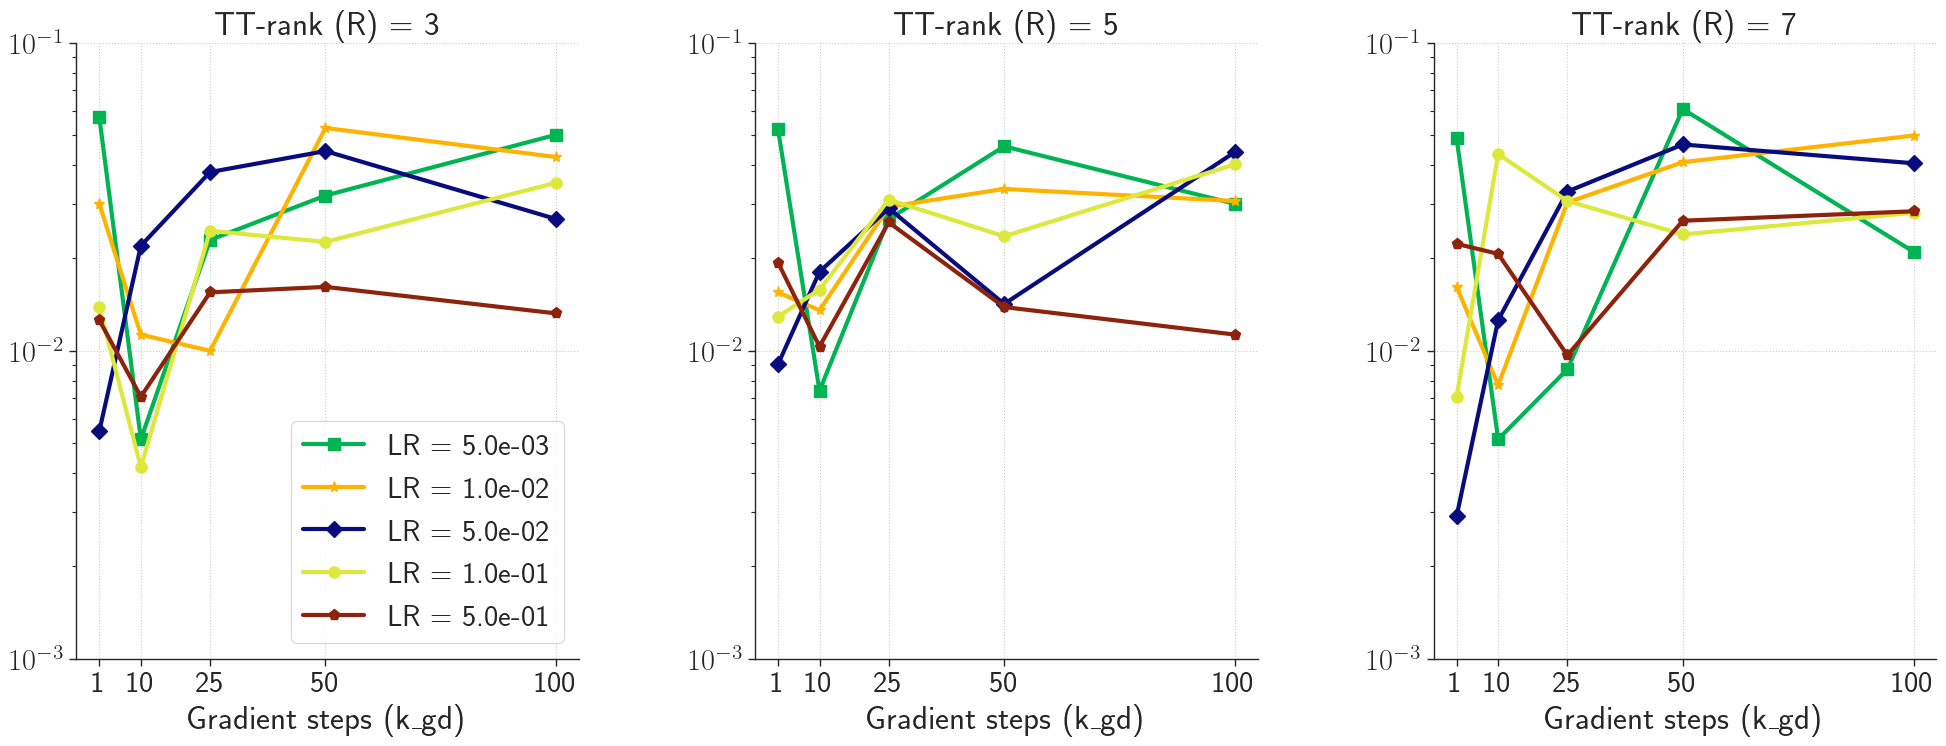

In [37]:
colors = ['#00B454', '#FFB300', '#080c7c', '#DDE83C', '#8d230d']
marker = ['s', '*', 'D', 'o', 'p']
    
fig, axs = plt.subplots(1, 3, figsize=(24, 8))
plt.subplots_adjust(wspace=0.35, hspace=0.35)
axs = axs.flatten()

num = -1
for r in r_list:
    num += 1
    ax = axs[num]
    ax.set_xlabel('Gradient steps (k_gd)')
    ax.set_title(f'TT-rank (R) = {r}')    
    
    for i, lr in enumerate(lr_list):
        x = k_gd_list
        y = [result_ext[r][lr][k_gd_cur]['e'] for k_gd_cur in x]
        ax.plot(x, y, label=f'LR = {lr:-7.1e}', 
            marker=marker[i], markersize=8, linewidth=3, color=colors[i])
    
    prep_ax(ax, xlog=False, ylog=True, leg=(num==0),
        xint=True, xticks=k_gd_list)
    ax.set_ylim(1.E-3, 1.E-1)

plt.savefig('figures/check_knapsack_ext.png', bbox_inches='tight')

---